In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("global_temps.csv")
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.17,-0.10,-0.21,-0.18,-0.11,-0.15,-0.24,-0.22,-0.18,-0.17,NaN,NaN,-0.12,-0.17,-0.20
1,1881,-0.20,-0.15,0.03,0.05,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.08,-0.09,-0.10,-0.18,0.04,-0.08,-0.19
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.14,-0.23,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.17,-0.10,-0.20
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.02,0.85,0.91,0.94,0.95,0.93,1.01,1.00,1.09,0.98,0.97,0.93,1.01,0.93,0.98
140,2020,1.18,1.25,1.17,1.13,1.02,0.92,0.90,0.88,0.99,0.89,1.11,0.81,1.02,1.04,1.17,1.11,0.90,0.99
141,2021,0.81,0.64,0.89,0.76,0.79,0.84,0.92,0.82,0.93,1.00,0.94,0.86,0.85,0.85,0.76,0.81,0.86,0.96
142,2022,0.91,0.90,1.05,0.84,0.84,0.93,0.94,0.96,0.90,0.97,0.73,0.80,0.90,0.90,0.89,0.91,0.94,0.87


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    float64
 11  Nov     143 non-null    float64
 12  Dec     143 non-null    float64
 13  J-D     143 non-null    float64
 14  D-N     142 non-null    float64
 15  DJF     143 non-null    float64
 16  MAM     144 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     143 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.5 KB


In [57]:
df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64

In [58]:
from miceforest import ImputationKernel
fillk = ImputationKernel(
    data = df,
    random_state = 12345,
    datasets=4,
    save_all_iterations=True
)

fillk.mice(3)
df = fillk.complete_data()

In [59]:
df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [60]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1951.500000,0.063333,0.070903,0.088889,0.063681,0.052917,0.038542,0.061181,0.058819,0.062778,0.089167,0.082014,0.055347,0.064514,0.065625,0.061528,0.068542,0.052153,0.078403
std,41.713307,0.423598,0.428513,0.433790,0.396609,0.377894,0.371756,0.352119,0.365885,0.363149,0.372800,0.378336,0.394073,0.372151,0.376269,0.404278,0.398376,0.358310,0.367843
min,1880.000000,-0.810000,-0.630000,-0.630000,-0.580000,-0.550000,-0.520000,-0.510000,-0.550000,-0.580000,-0.580000,-0.550000,-0.820000,-0.480000,-0.490000,-0.670000,-0.580000,-0.500000,-0.520000
25%,1915.750000,-0.240000,-0.240000,-0.222500,-0.250000,-0.240000,-0.250000,-0.190000,-0.220000,-0.190000,-0.200000,-0.172500,-0.220000,-0.200000,-0.210000,-0.230000,-0.252500,-0.212500,-0.190000
50%,1951.500000,-0.015000,-0.040000,0.015000,-0.025000,-0.040000,-0.050000,-0.030000,-0.045000,-0.055000,0.010000,0.020000,-0.040000,-0.045000,-0.055000,-0.040000,-0.025000,-0.045000,-0.010000
75%,1987.250000,0.310000,0.382500,0.322500,0.282500,0.272500,0.252500,0.252500,0.252500,0.250000,0.260000,0.242500,0.320000,0.280000,0.282500,0.312500,0.310000,0.257500,0.265000
max,2023.000000,1.180000,1.370000,1.360000,1.130000,1.020000,0.930000,0.940000,1.020000,0.990000,1.090000,1.110000,1.160000,1.020000,1.040000,1.240000,1.140000,0.940000,1.000000


<AxesSubplot:>

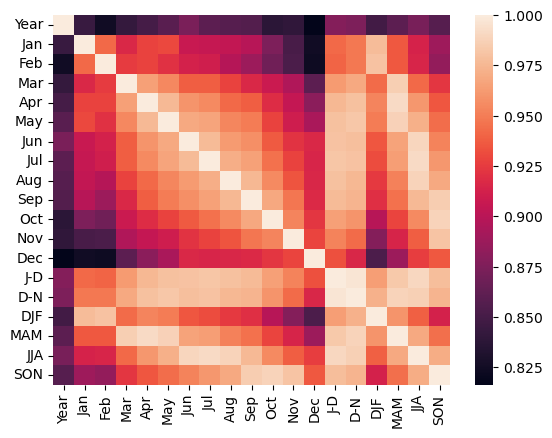

In [61]:
sns.heatmap(df.corr())

In [62]:
data = df[['Dec', 'Jan', 'Feb', 'DJF']]
data.tail(10)

,Dec,Jan,Feb,DJF
134,0.78,0.76,0.55,0.67
135,1.16,0.86,0.91,0.85
136,0.87,1.17,1.37,1.24
137,0.93,1.02,1.14,1.01
138,0.92,0.82,0.85,0.87
139,1.09,0.93,0.95,0.93
140,0.81,1.18,1.25,1.17
141,0.86,0.81,0.64,0.76
142,0.80,0.91,0.90,0.89
143,0.56,0.87,0.98,0.88


In [63]:
X = data.drop(['DJF'], axis = 1)
Y = data['DJF']

In [74]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 1)

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_true = y_test
y_pred = model.predict(x_test)

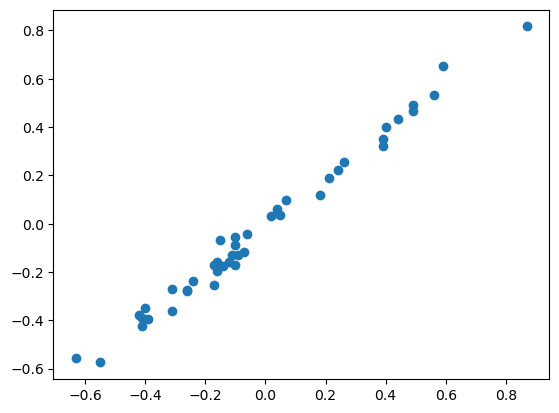

In [77]:
plt.scatter(y_true, y_pred)

In [78]:
temp = model.predict([[0.92, 0.82, 0.85]])
temp

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.81642303])

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
# r2_score compare with mean value
r2 = r2_score(y_true, y_pred)

print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")


mean absolute error: 0.03
mean squared error: 0.00
root mean squarred error: 0.04
r2 score = 0.99
